In [1]:
# importing all of the libaries from Qiskit as well as viz tools
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

In [23]:
# making our circuit with 3 qubits and 3 classical bits
# we will teleport information from q0 to q2

circuit = QuantumCircuit(3,3)

# teleporting output of hadamard gate
circuit.h(0)
circuit.barrier()

# entangling states between q1 and q2
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

# applying CNOT on q1
circuit.cx(0,1)

# appplying hadamard on q0
circuit.h(0)

# measure q0 and q1
circuit.measure([0,1],[0,1])
circuit.barrier()

# applying X and Z gates
circuit.cx(1,2)
circuit.cz(0,2)

# q0 is now teleported
circuit.measure(2,2)

In [24]:
circuit.draw()


┌───┐ ░            ░      ┌───┐┌─┐ ░            
q_0: ┤ H ├─░────────────░───■──┤ H ├┤M├─░───────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░       │    
q_1: ──────░─┤ H ├──■───░─┤ X ├─┤M├──╫──░───■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────╫───╫──░─┤ X ├─■─┤M├
           ░      └───┘ ░        ║   ║  ░ └───┘   └╥┘
c: 3/════════════════════════════╩═══╩═════════════╩═
                                 1   0             2

In [27]:
# now to simlulate this with qasm
backend = Aer.get_backend('qasm_simulator')
simulator = execute(circuit, backend, shots=1024)

# store the results
results = simulator.result()

{'000': 135, '001': 128, '010': 114, '011': 133, '100': 119, '101': 120, '110': 138, '111': 137}


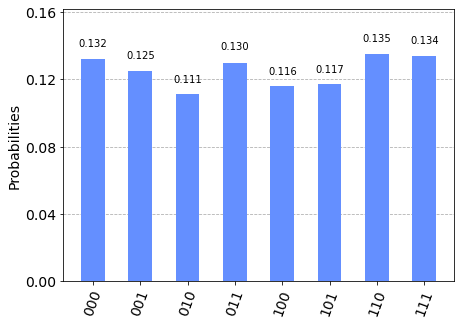

In [30]:
# counting the frequencies of the possible states
counts = results.get_counts(circuit)
print(counts)
plot_histogram(counts)